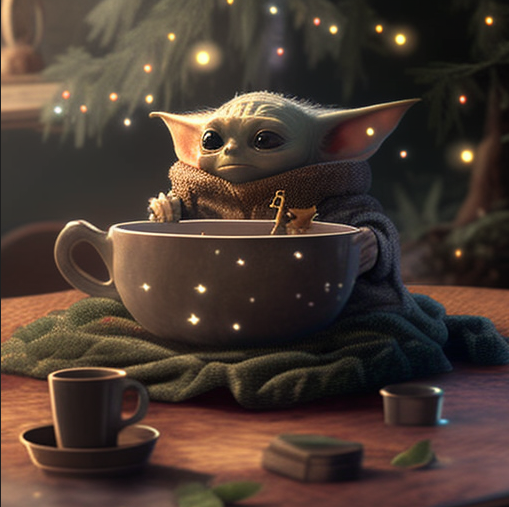

In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
im2=cv2.imread('/content/baby yoda.png')
cv2_imshow(im2)


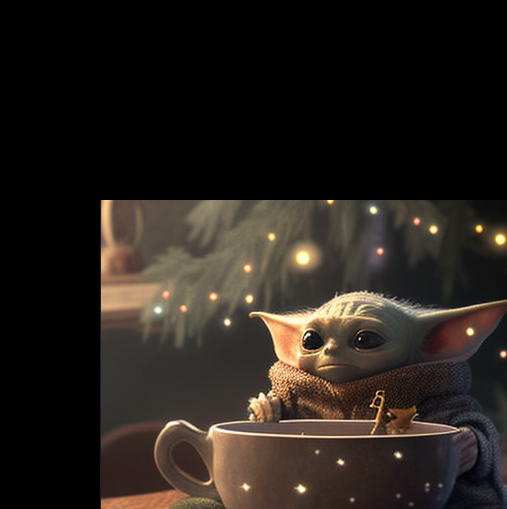

In [3]:
# im2.shape
translation_matrix = np.float32([[1,0,100], [0,1,200]])
img_translation = cv2.warpAffine(im2, translation_matrix,
(im2.shape[0], im2.shape[1]))
cv2_imshow(img_translation)


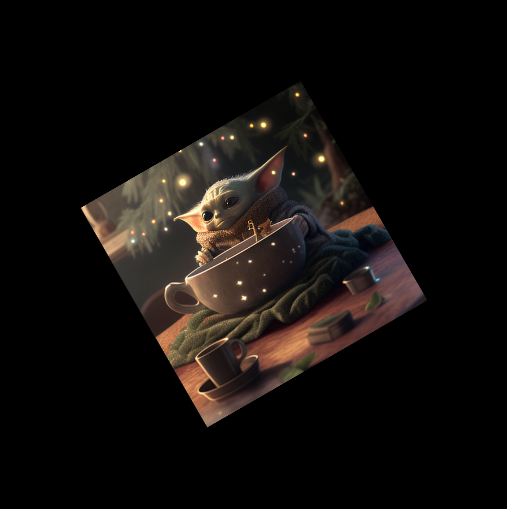

In [4]:
rotation_matrix = cv2.getRotationMatrix2D((im2.shape[0]/2,
im2.shape[1]/2), 30, 0.5)
img_rotation = cv2.warpAffine(im2, rotation_matrix,
(im2.shape[0], im2.shape[1]))
cv2_imshow(img_rotation)


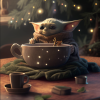

In [5]:
# img_scaled = cv2.resize(im2, None, fx=2., fy=2., interpolation=cv2.INTER_CUBIC)
img_scaled = cv2.resize(im2,(100, 100), interpolation=cv2.INTER_AREA)

cv2_imshow(img_scaled)

507 509


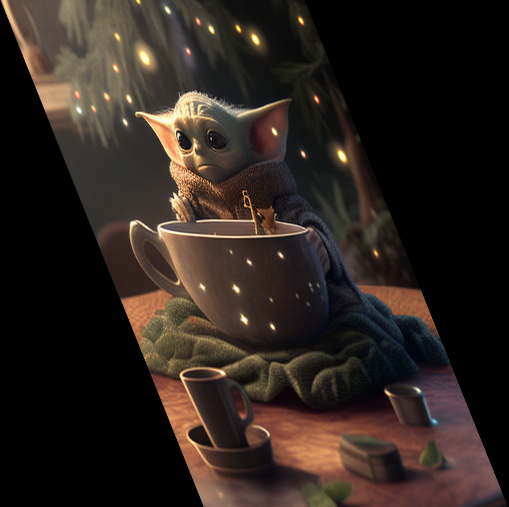

In [6]:
rows, cols = im2.shape[:2]
print(im2.shape[0],im2.shape[1])
src_points = np.float32([[0,0], [cols-1,0], [0,rows-1]])
dst_points = np.float32( [[0,0], [int(0.6*(cols-1)),0], [int(0.4*(cols-1)),rows-1]])
affine_matrix = cv2.getAffineTransform(src_points, dst_points)
img_output = cv2.warpAffine(im2, affine_matrix, (cols,rows))
cv2_imshow(img_output)

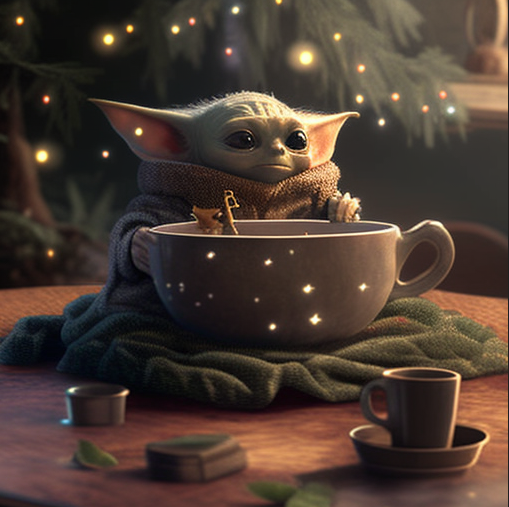

In [7]:
src_points = np.float32([[0,0], [cols-1,0], [0,rows-1]])
dst_points = np.float32([[cols-1,0], [0,0], [cols-1,rows-1]])
affine_matrix = cv2.getAffineTransform(src_points, dst_points)
img_output = cv2.warpAffine(im2, affine_matrix, (cols,rows))
cv2_imshow(img_output)

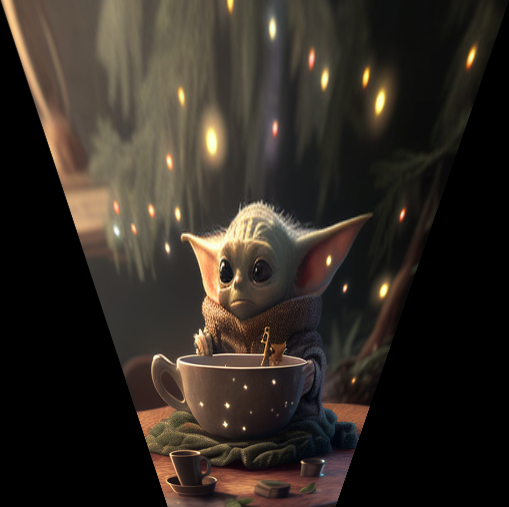

In [8]:
src_points = np.float32([[0,0], [cols-1,0], [0,rows-1], [cols-1,rows-1]])
dst_points = np.float32([[0,0], [cols-1,0], [int(0.33*cols),rows-1],
[int(0.66*cols),rows-1]])
projective_matrix = cv2.getPerspectiveTransform(src_points,
dst_points)
img_output = cv2.warpPerspective(im2, projective_matrix, (cols,rows))
cv2_imshow(img_output)

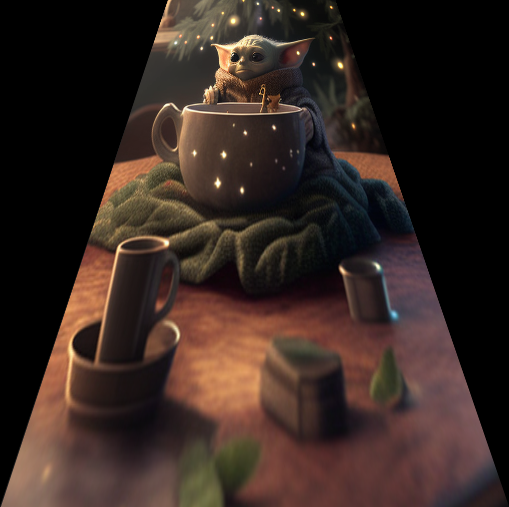

In [9]:
src_points = np.float32([[0,0], [cols-1,0], [0,rows-1], [cols-1,rows-1]])
dst_points = np.float32([[int(0.33*cols),0], [int(0.66*cols),0],[0,rows-1] ,[cols-1,rows-1]
])
projective_matrix = cv2.getPerspectiveTransform(src_points,
dst_points)
img_output = cv2.warpPerspective(im2, projective_matrix, (cols,rows))
cv2_imshow(img_output)

507 509
[[3.500e+03 0.000e+00 2.545e+02]
 [0.000e+00 3.500e+03 2.535e+02]
 [0.000e+00 0.000e+00 1.000e+00]]


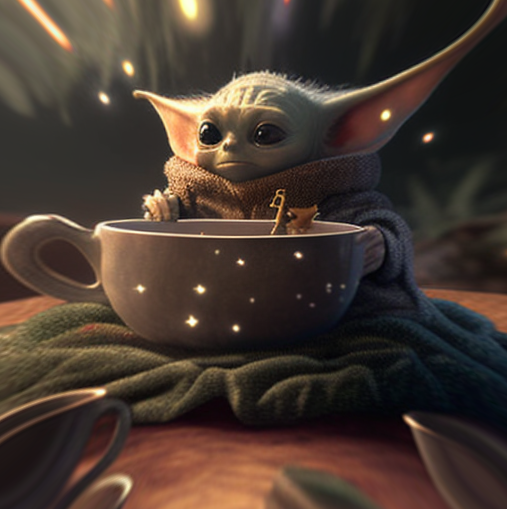

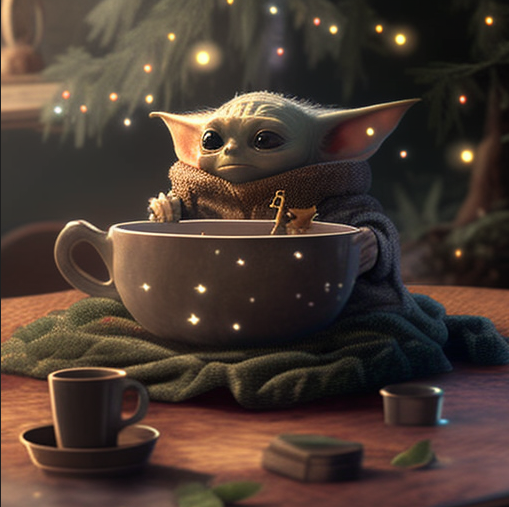

In [10]:
src = cv2.imread('baby yoda.png')
h, w = src.shape[0:2]
# получаем высоту и ширину изображения для 
print(h, w)

# заполняем матрицу преобразования. сначала все нулями
intrinsics = np.zeros((3, 3), np.float64)

# матрица intrinsics
intrinsics[0, 0] = 3500
intrinsics[1, 1] = 3500
intrinsics[2, 2] = 1.0
intrinsics[0, 2] = w/2.
intrinsics[1, 2] = h/2.
print(intrinsics)

newCamMtx = np.zeros((3, 3), np.float64)
newCamMtx[0, 0] = 3500
newCamMtx[1, 1] = 3500
newCamMtx[2, 2] = 1.0
newCamMtx[0, 2] = w/2.
newCamMtx[1, 2] = h/2.

dist_coeffs = np.zeros((1, 4), np.float64)
dist_coeffs[0, 0] = -40.0
dist_coeffs[0, 1] = 0.0
dist_coeffs[0, 2] = 0.0
dist_coeffs[0, 3] = -0.0


map1, map2 = cv2.initUndistortRectifyMap(intrinsics, dist_coeffs, None, newCamMtx, src.shape[:2], cv2.CV_16SC2)
res = cv2.remap(src, map1, map2, cv2.INTER_LINEAR)

cv2_imshow(res)
cv2_imshow(src)

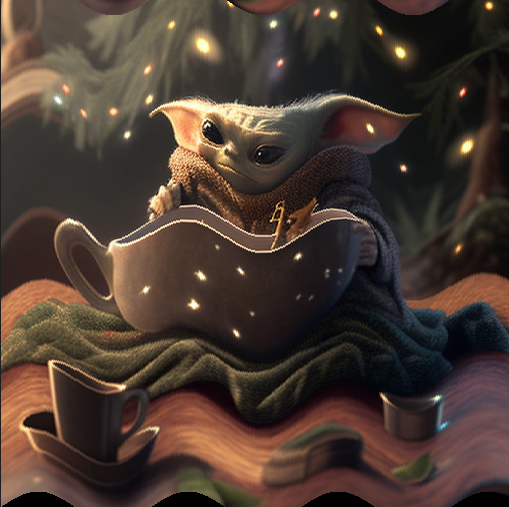

In [11]:
import math
img_output = np.zeros(im2.shape, dtype=im2.dtype)
for i in range(im2.shape[0]):
  for j in range(im2.shape[1]):
    offset_x = 0
    offset_y = int(16.0*math.sin(2*3.14*j/150))
    if i+offset_y < im2.shape[0]:
      img_output[i,j] = im2[(i+offset_y)%im2.shape[0],j]
    else:
      img_output[i,j] = 0
cv2.imwrite('images/Horizontal_wave.jpg', img_output)
cv2_imshow(img_output)

(507, 509, 3)


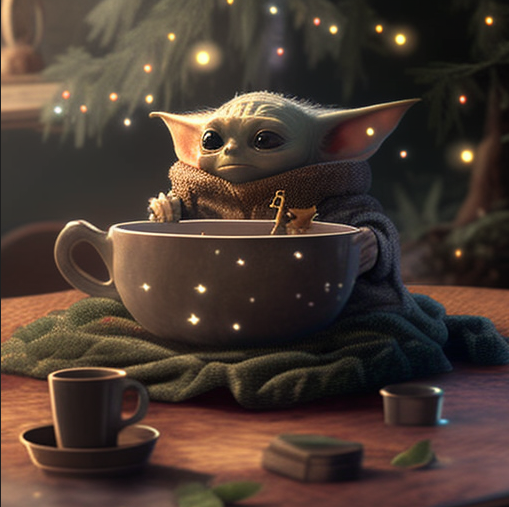

(507, 509, 3)


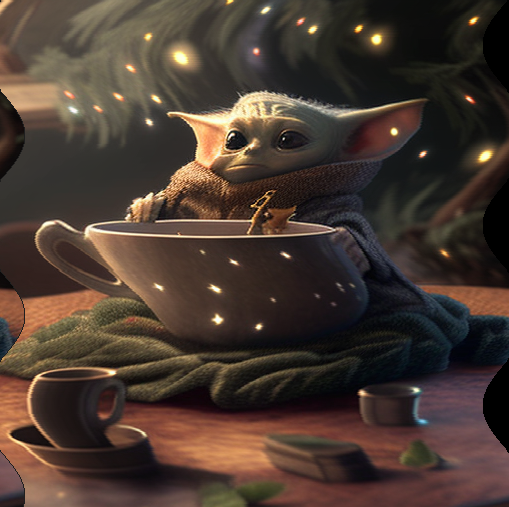

In [12]:
import numpy as np
import math

rows, cols = im2.shape[:2]
#####################
# Vertical wave
print(im2.shape)
cv2_imshow(im2)
img_output1 = np.zeros(im2.shape, dtype=im2.dtype)
for i in range(rows):
  for j in range(cols):
    offset_x = int(25.0*math.sin(2*3.14*i/180))
    offset_y = 0
    if j+offset_x < rows:
      img_output1[i,j] = im2[i,(j+offset_x)%cols]
    else:
      img_output1[i,j] = 0
print(img_output1.shape)
cv2_imshow(img_output1)

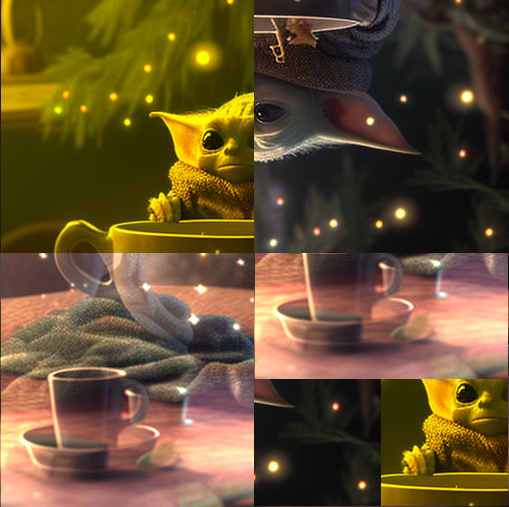

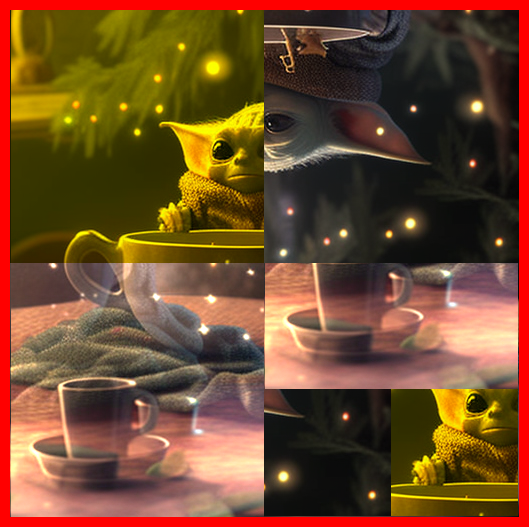

In [13]:
from numpy.core.multiarray import concatenate

from numpy.lib.function_base import copy

yoda=copy(im2)
n_rows, n_cols, n_channels = yoda.shape
yoda_l_top = yoda[0:n_rows // 2, 0:n_cols//2]
yoda_r_top=yoda[0:n_rows // 2, n_cols//2:]
yoda_l_bot = yoda[n_rows // 2:, 0:n_cols//2]
yoda_r_bot=yoda[n_rows // 2:, (n_cols//2)+1:]
# cv2_imshow(yoda)
#1
for i in range(yoda_l_top.shape[0]):
  for j in range(yoda_l_top.shape[1]):
    yoda_l_top[i,j,0]=0
#2

yoda_r_top[:]=yoda_r_top[::-1]
#3
# yoda_l_bot[:]=yoda_l_bot+yoda_r_bot
# print(yoda_l_bot.shape,yoda_r_bot.shape)
yoda_l_bot[:]=cv2.add(yoda_l_bot,yoda_r_bot)
#4

rectangle1=yoda_l_bot[yoda_l_bot.shape[0]//2:,0:]
rectangle11=yoda_l_bot[yoda_l_bot.shape[0]//2:,0:yoda_l_bot.shape[1]//2]
rectangle12=yoda_l_bot[yoda_l_bot.shape[0]//2:,yoda_l_bot.shape[1]//2:]
rectangle2=yoda_l_top[yoda_l_top.shape[0]//2:,yoda_l_top.shape[1]//2:]
rectangle3=yoda_r_top[yoda_r_top.shape[0]//2:,yoda_r_top.shape[1]//2:]
# print(rectangle1.shape,rectangle2.shape,rectangle3.shape)
# print(int(len(rectangle1)/2))
# cv2_imshow(rectangle2)
# cv2_imshow(rectangle3)
h=yoda.shape[0]
w=yoda.shape[1]
# print(rectangle11.shape,rectangle12.shape,rectangle3.shape,rectangle2.shape)
yoda[h // 2 : h // 2 + rectangle11.shape[0] , w // 2 : w // 2 + rectangle11.shape[1]] = rectangle11 #левое верхний угол
yoda[h // 2 : h // 2 + rectangle12.shape[0] , w // 2 + w // 4 : w // 2 + w // 4 + rectangle12.shape[1]] = rectangle12 #правый верхний
yoda[h // 2 + h // 4 : h // 2 + h // 4 + rectangle3.shape[0] , w // 2 : w // 2 + rectangle3.shape[1]] = rectangle3 # левый нижний
yoda[h // 2 + h // 4 : h // 2 + h // 4 + rectangle2.shape[0] , w // 2 + w//4: w // 2+ w//4 + rectangle2.shape[1]] = rectangle2 # праый нижний
border = cv2.copyMakeBorder(yoda,10,10,10,10,cv2.BORDER_CONSTANT,value=[0, 0, 255])
cv2_imshow(yoda)
cv2_imshow(border)





image shape:  (507, 509, 3)


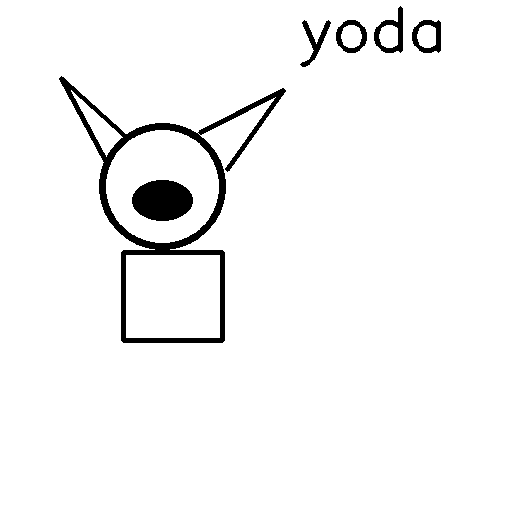

(507, 509, 3)
(507, 509, 3)


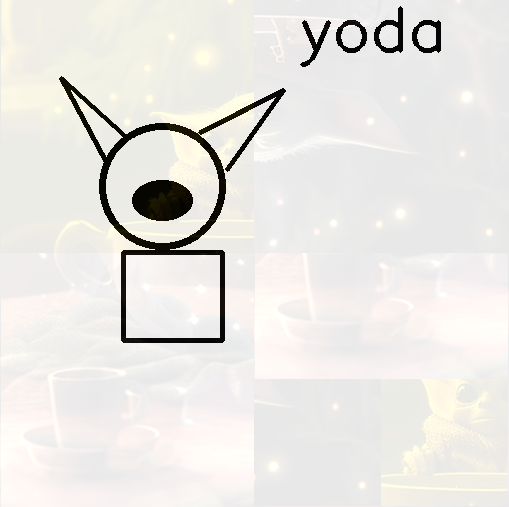

In [21]:
image3 = np.zeros([yoda.shape[0],yoda.shape[1],3],dtype=np.uint8)
image3.fill(255)
# or img[:] = 255
print("image shape: ", image3.shape)
font = cv2.FONT_HERSHEY_SIMPLEX # для текста
pts = np.array([[105,160],[61,78],[124,135]], np.int32)
pts2 = np.array([[200,132],[283,90],[227,169]], np.int32) 
cv2.circle(image3,(162,186), 60,(0,0,0), 5) 
cv2.rectangle(image3,(123,252),(222,340),(0,0,0),4) 
cv2.ellipse(image3,(162, 200),(30, 20), 0, 0, 360,(0,0,0), -1)
cv2.putText(image3,'yoda',(300,50), font, 2,(0,0,0),3)
cv2.polylines(image3, [pts], False,(0,0,0), 4)
cv2.polylines(image3, [pts2], False,(0,0,0), 4)
cv2_imshow(image3)
print(yoda.shape)
print(image3.shape)
image4 = cv2.addWeighted(yoda,0.1,image3,0.9,1)
cv2_imshow(image4)